---
title: The Black-Scholes Model
format: html
---

### Black & Scholes Option Pricing

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Black-Scholes, or sometimes Black-Scholes-Merton, is a mathematical model that seeks to explain the behavior of financial derivatives, most commonly options. It was proposed by Black and Scholes in 1973. It gave theoretical support for trading options to hedge positions, which had been practice but lacked solid support. From the model we are able to calculate what the price of an option should be based on a number of different factors. Nowadays there are numerous variations of the Black-Scholes model, each of which seeks to improve the model based on certain criteria, usually at the cost of a significant increase in complexity. This paper will focus on the original model, the basis for all other models.

There is a bit of notation, we're going to lay it down before we get to the equations.

-   C = Call option price

-   S = Current stock price

-   X = Strike price of the option (or K)

-   r = risk-free interest rate (a number between 0 and 1)

-   $\sigma$ = volatility of the stocks return (a number between 0 and 1)

-   t = time to option maturity (in years)

-   N = normal cumulative distribution function

**The model:**

$$\mathrm C(\mathrm S,\mathrm t)= \mathrm N(\mathrm d_1)\mathrm S - \mathrm N(\mathrm d_2) \mathrm X \mathrm e^{-rt}$$

Where:

$$C_0 = \text{the value of a European option at time t = 0.}$$

$$\mathrm d_1= \frac{1}{\sigma \sqrt{\mathrm t}} \left[\ln{\left(\frac{S}{X}\right)} + t\left(r + \frac{\sigma^2}{2} \right) \right]$$

$$\mathrm d_2= d_1-\sigma\sqrt{t}$$
$$N(x)=\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} \mathrm e^{-\frac{1}{2}z^2} dz$$


$N(d)$ = Probability that a standardized, normally distributed, random variable will be less than or equal to $d$.

In [2]:
N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)


Find the value of a six-month call option on Hardcraft, Inc. with an exercise price of $150. The current value of a share of Hardcraft is $160. The interest rate available in the U.S. is R = 5%. The option maturity is 6 months (half of a year). The volatility of the underlying asset is 30% per annum. Note that the intrinsic value of the option is $10, so our answer must be at least that amount.

In [3]:
S, K, r, t, sigma = 160, 150, 0.05, 0.5, 0.3

In [4]:
print(f'Call Value: ${BS_CALL(S, K, t, r, sigma):5.2f}\n')

Call Value: $20.92



In [5]:
print(f'Put Value: ${BS_PUT(S, K, t, r, sigma):5.2f}\n')

Put Value: $ 7.22



### Stock Price Effect on Option Value ### 

Here we will hold constant all the variables except the current stock price S and examine how the value of calls and puts change. 

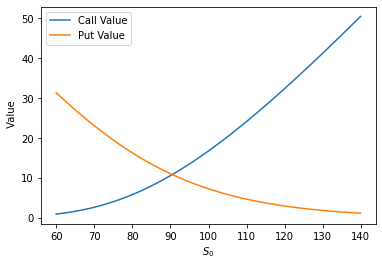

In [6]:
K = 100
r = 0.1
T = 1
sigma = 0.3

S = np.arange(60,140,0.1)

calls = [BS_CALL(s, K, T, r, sigma) for s in S]
puts = [BS_PUT(s, K, T, r, sigma) for s in S]
plt.plot(S, calls, label='Call Value')
plt.plot(S, puts, label='Put Value')
plt.xlabel('$S_0$')
plt.ylabel(' Value')
plt.legend()

### σ Effect on Option Value ###

 

As we would expect, when we hold the other variables constant, and increase the volatility parameter both calls and puts increase in value, in what appears to be a linear fashion as shown below.

To understand why the calls value seems to be strictly greater than the put with respect to volatility, change the interest rate r
 to 0 and notice that the curve coincide exactly. Rather than making plots for the effect on interest rates, we can deduce from this that an increase in interest rates increases the value of calls and decreases the value of puts. 

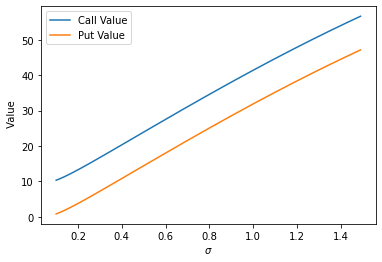

In [7]:
K = 100
r = 0.1
T = 1
Sigmas = np.arange(0.1, 1.5, 0.01)
S = 100

calls = [BS_CALL(S, K, T, r, sig) for sig in Sigmas]
puts = [BS_PUT(S, K, T, r, sig) for sig in Sigmas]
plt.plot(Sigmas, calls, label='Call Value')
plt.plot(Sigmas, puts, label='Put Value')
plt.xlabel('$\sigma$')
plt.ylabel(' Value')
plt.legend()

### Effect of Time on Black-Scholes Price ###
As we increase time we increase the uncertainty regarding the future price. Since uncertainty is to the options holder benefit, the price of the option increases with time. Again try setting the interest rate to zero to observe that the difference between puts and calls is eliminated. 



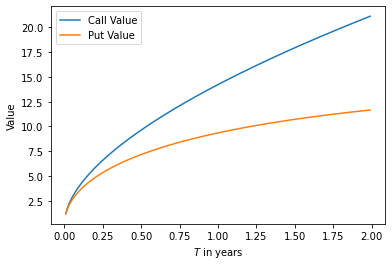

In [8]:
K = 100
r = 0.05
T = np.arange(0, 2, 0.01)
sigma = 0.3
S = 100

calls = [BS_CALL(S, K, t, r, sigma) for t in T]
puts = [BS_PUT(S, K, t, r, sigma) for t in T]
plt.plot(T, calls, label='Call Value')
plt.plot(T, puts, label='Put Value')
plt.xlabel('$T$ in years')
plt.ylabel('Value')
plt.legend()

### Main Problem with Black Scholes ###
The script below calculates the rolling standard deviation for APPLE over approximately 10 years. Notice that the volatility is in no way stable, if we take the standard deviation over the entire sample it is approximately 0.28 , however, notice that in early-mid 2020 during there is a large spike. As mentioned, the Black-Scholes model assumes this parameter is constant. 

 

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'AAPL Rolling Volatility')

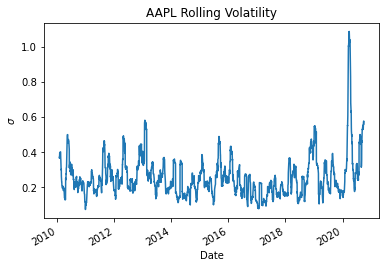

In [9]:
import pandas as pd
import datetime as dt
import yfinance as yf  # This gets us prices from Yahoo finance. See https://pypi.org/project/yfinance/

start = dt.datetime(2010,1,1)    
end =dt.datetime(2020,10,1) 
symbol = 'AAPL' ###using Apple as an example
source = 'yahoo'

data = yf.download('AAPL', start, end, progress=True)

data['change'] = data['Adj Close'].pct_change()
data['rolling_sigma'] = data['change'].rolling(20).std() * np.sqrt(255)


data.rolling_sigma.plot()
plt.ylabel('$\sigma$')
plt.title('AAPL Rolling Volatility')

Another key problem is that the model underestimates the tail density. The KDE plot below shows the empircal verus a normal distribution for Apple stock. This means that Black-Scholes will underestimate the value of out-of-the-money options. 

Text(0, 0.5, 'Density')

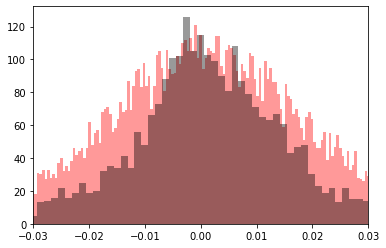

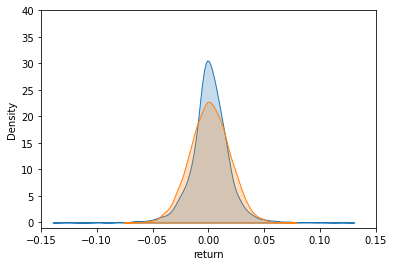

In [10]:
std = data.change.std()
Ndraws = 10000
WT = np.random.normal(data.change.mean(),std, size=Ndraws)
plt.hist(np.exp(WT)-1,bins=300,color='red',alpha=0.4);
plt.hist(data.change,bins=200,color='black', alpha=0.4);
plt.xlim([-0.03,0.03])

import seaborn as sns

fig, ax = plt.subplots()
ax = sns.kdeplot(data=data['change'].dropna(), label='Empirical', ax=ax,shade=True)
ax = sns.kdeplot(data=WT, label='Log Normal', ax=ax,shade=True)
plt.xlim([-0.15,0.15])
plt.ylim([-1,40])
plt.xlabel('return')
plt.ylabel('Density')